In [879]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pywt
from scipy import signal
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel

In [886]:
df=pd.read_csv('center_sternum.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX  MagnY  MagnZ        qw        qi        qj  \
0     -14.244280  1.404580   -454   -490   -178  0.792622  0.254952 -0.553850   
1     -12.290080 -7.969466   -454   -490   -177  0.736461  0.275124 -0.617969   
2      -4.961832 -7.450382   -454   -490   -177  0.729465  0.275246 -0.626118   
3       2.519084 -5.984733   -454   -492   -176  0.723413  0.277200 -0.632221   
4       5.404580  4.015267   -454   -492   -176  0.721948  0.280007 -0.632679   
...          ...       ...    ...    ...    ...       ...       ...       ...   
16501   2.305344 -0.671756   -494   -449   -126  0.650810  0.379162 -0.636402   
16502   2.488550 -0.702290   -494   -450   -125  0.650239  0.379803 -0.636708   
16503   3.374046 -0.900763   -494   -450   -125  0.649365  0.380627 -0.637227   
16504   3.664122 -1.587786   -495   -448   -124  0.648973  0.381329 -0.637348   
16505   4.061069 -1.343511   -495   -448   -124  0.648462  0.382336 -0.637471   

             qk    Time  
0     -0.000031   0.000  
1      0.006806   0.005  
2      0.009827   0.010  
3      0.011383   0.015  
4      0.010193   0.020  
...         ...     ...  
16501  0.166356  82.505  
16502  0.165960  82.510  
16503  0.165502  82.515  
16504  0.164953  82.520  
16505  0.164159  82.525  

[16506 rows x 17 columns]

In [887]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
limits=[10,70]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time    AccX     AccY     AccZ     GyroX     GyroY     GyroZ
2001   10.005 -19.154  112.362 -971.608  1.557252  4.198473 -1.083969
2002   10.010 -27.450  110.593 -944.280  0.931298  4.320611 -1.099237
2003   10.015 -21.777  113.948 -940.803  0.946565  4.137404 -1.267176
2004   10.020 -32.391  118.218 -924.394  1.022901  4.702290 -0.992366
2005   10.025 -22.448  118.889 -945.195  1.725191  4.091603 -0.641221
...       ...     ...      ...      ...       ...       ...       ...
13995  69.975 -36.478  113.582 -936.777 -3.145038  3.465649 -0.610687
13996  69.980 -30.866  118.767 -941.108 -3.175573  3.358779 -0.778626
13997  69.985 -32.818  118.279 -942.145 -2.992366  3.679389 -0.549618
13998  69.990 -22.692  113.704 -948.184 -3.022901  3.786260 -0.564885
13999  69.995 -38.674  119.743 -937.143 -2.854962  3.419847 -0.885496

[11999 rows x 7 columns]

## Plots

<IPython.core.display.Javascript object>


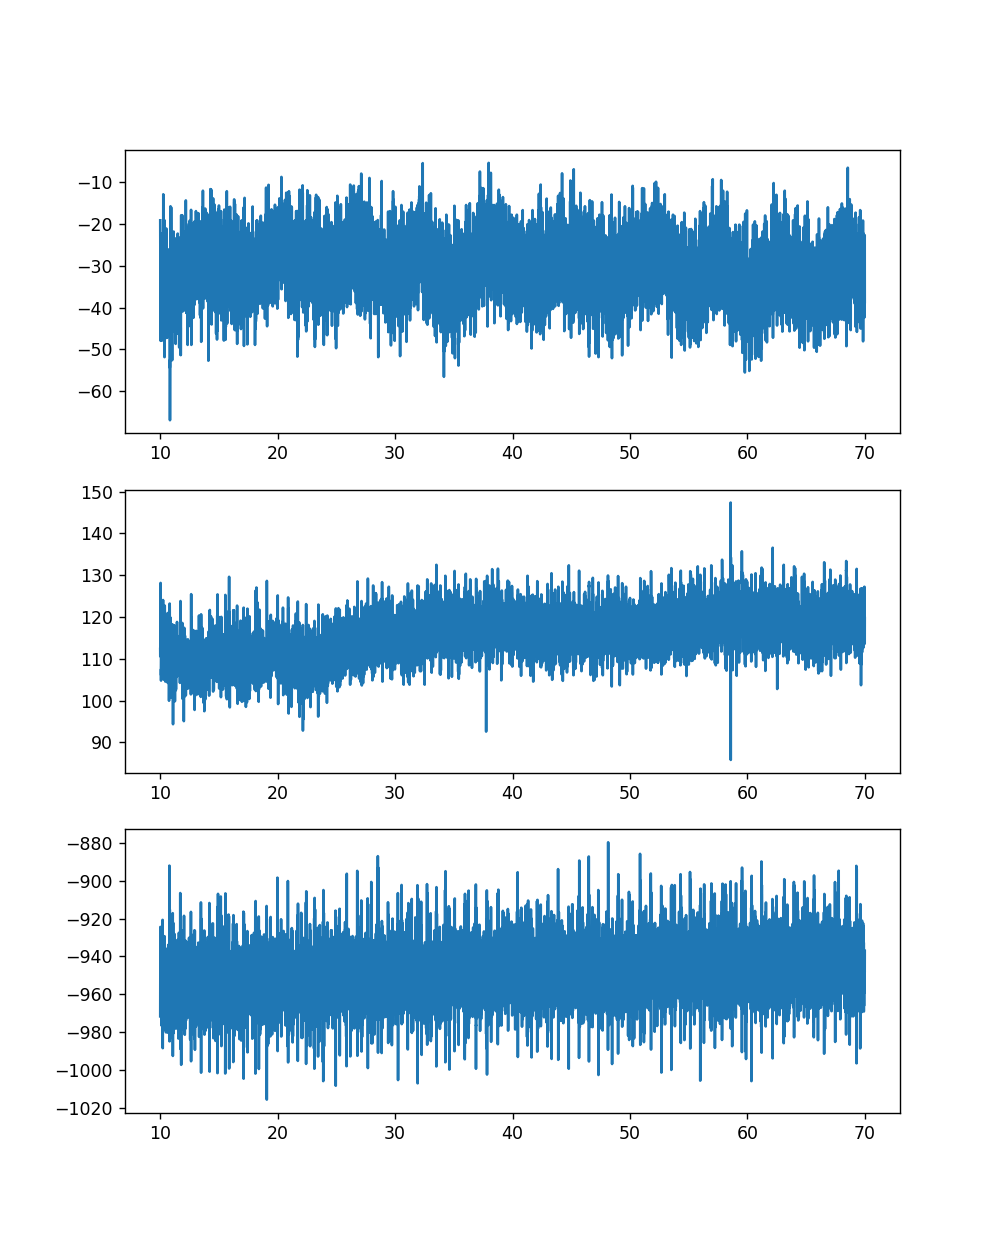

In [888]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])


<IPython.core.display.Javascript object>


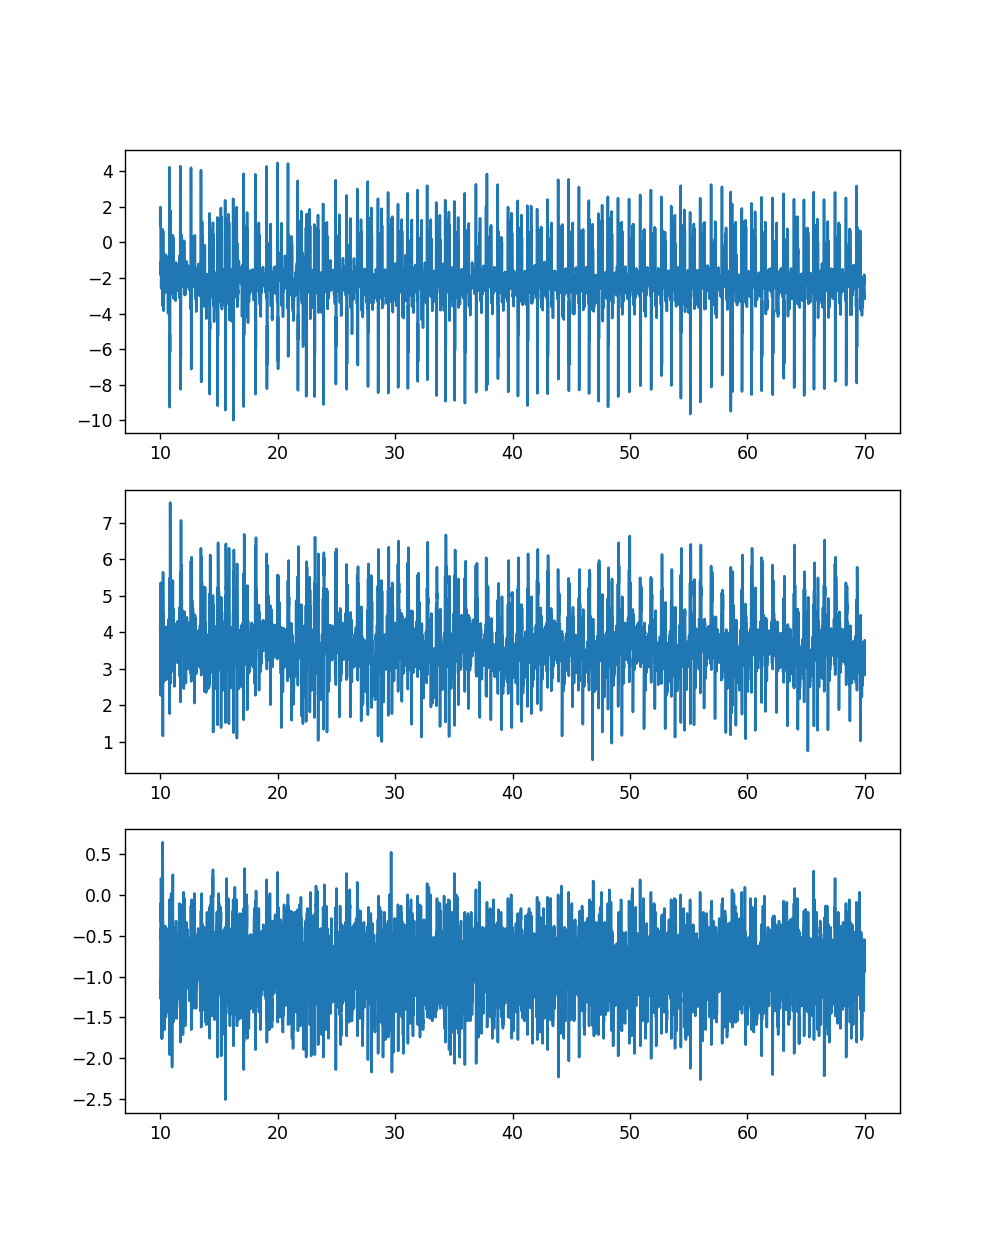

In [889]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'])
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])


<IPython.core.display.Javascript object>


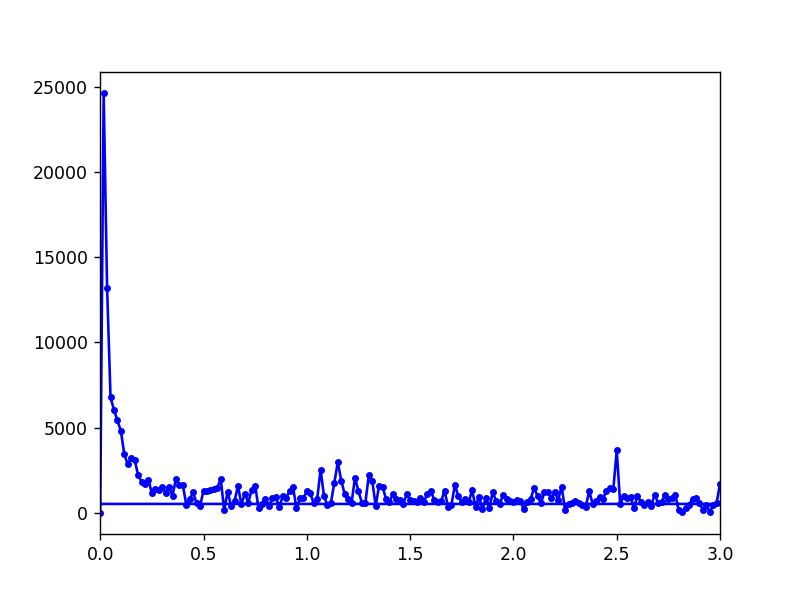

(-0.001, 3.0)

In [890]:

gyroxfreq=np.fft.fft(Df['AccZ'].values-np.mean(Df['AccZ'].values))
freq=np.fft.fftfreq(d=1/log_freq, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq),'b-o', markersize=3)
plt.xlim(-0.001,3)

## wavelet filtering

<IPython.core.display.Javascript object>


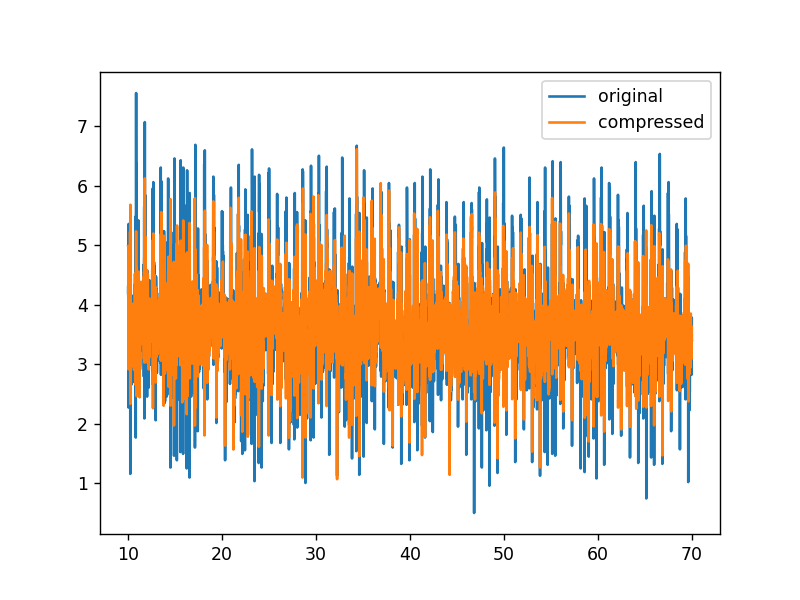

In [891]:
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)
#compression
div=0.1
for j in range(len(coeff)):
    mean=np.mean(coeff[j])
    coeff[j][coeff[j]<mean/div]=coeff[j][coeff[j]<mean/div]+(mean-coeff[j][coeff[j]<mean/div])
    
coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
coeff
plt.figure()
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y[:-1],label='compressed')
plt.legend()
# plt.figure()
# #plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

<IPython.core.display.Javascript object>


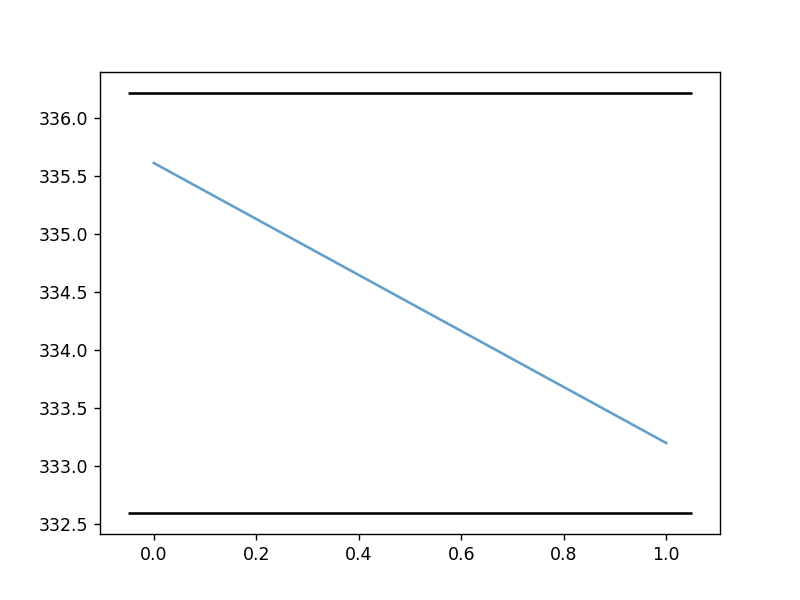

<IPython.core.display.Javascript object>


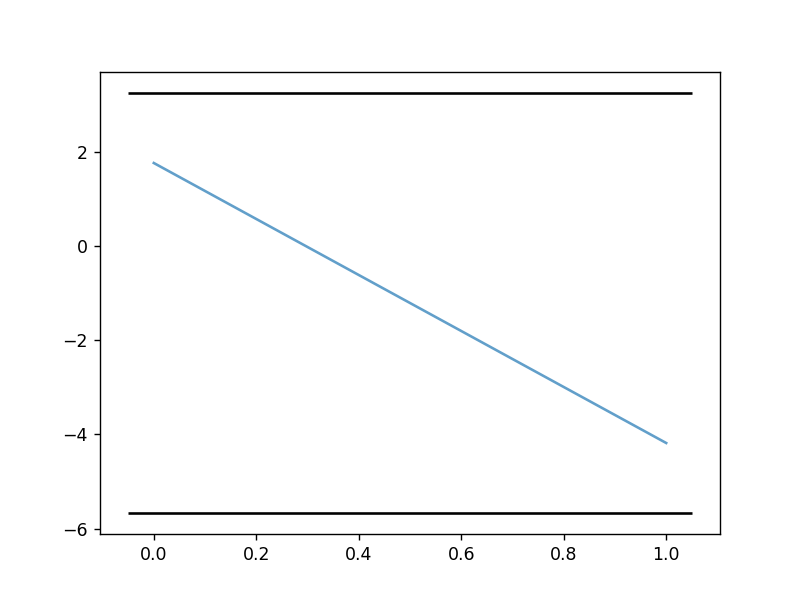

<IPython.core.display.Javascript object>


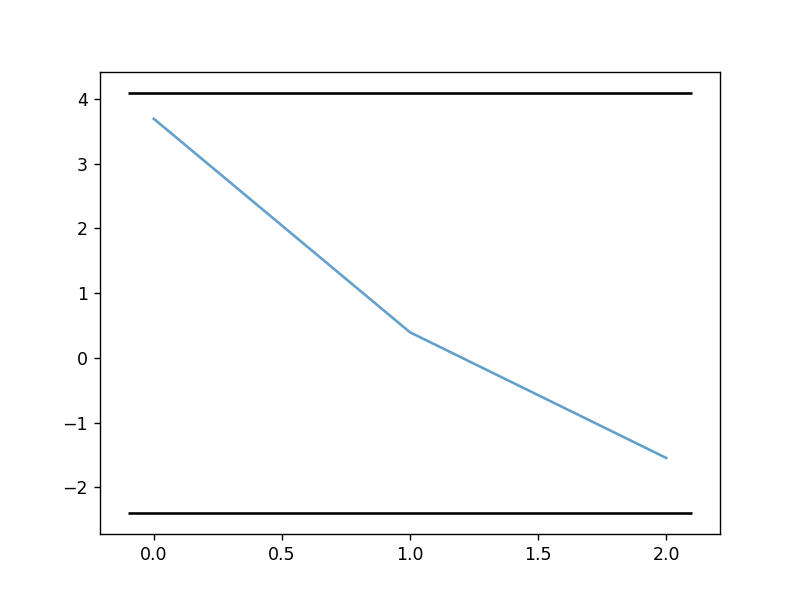

<IPython.core.display.Javascript object>


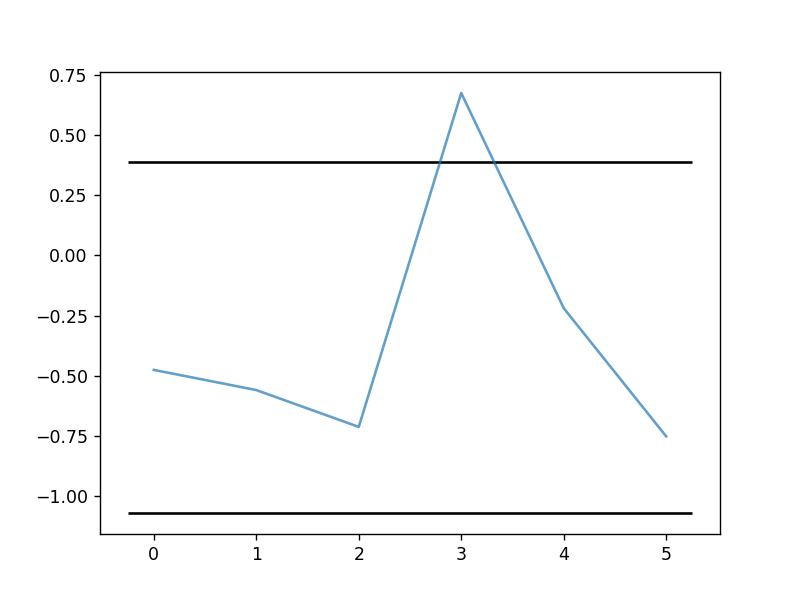

<IPython.core.display.Javascript object>


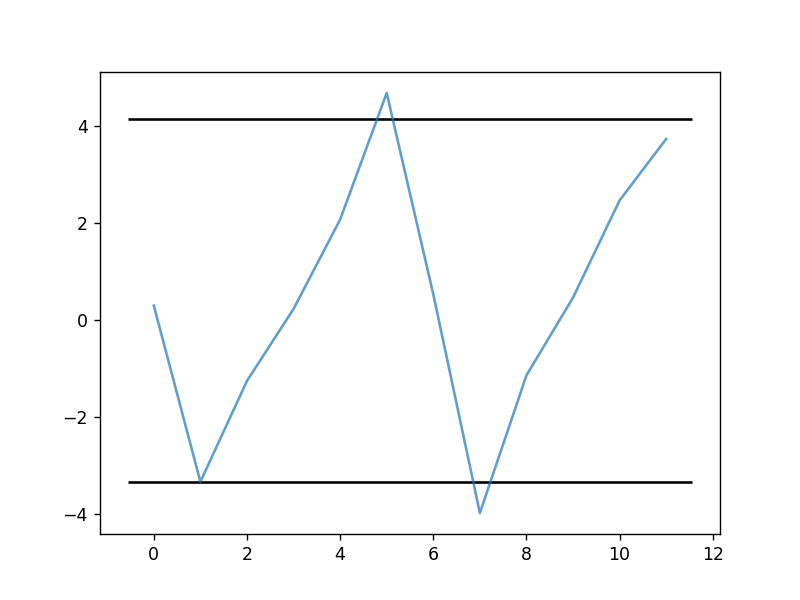

<IPython.core.display.Javascript object>


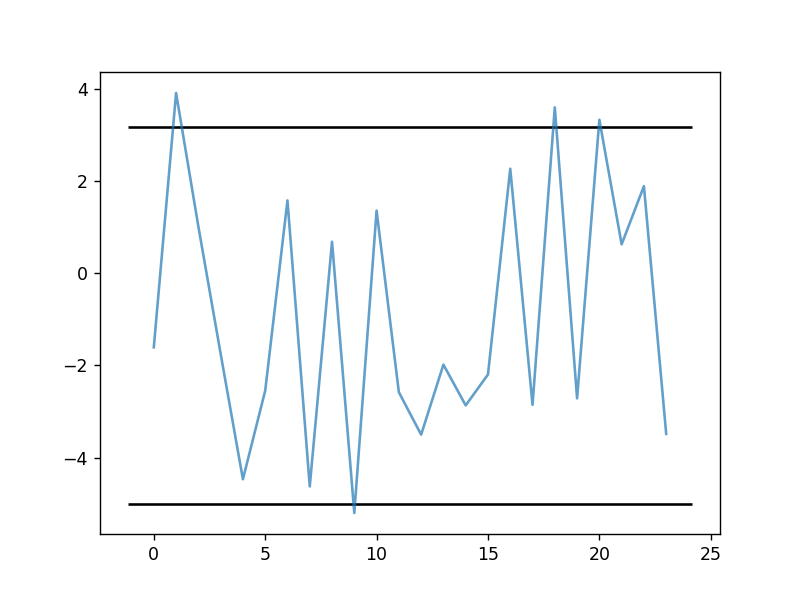

<IPython.core.display.Javascript object>


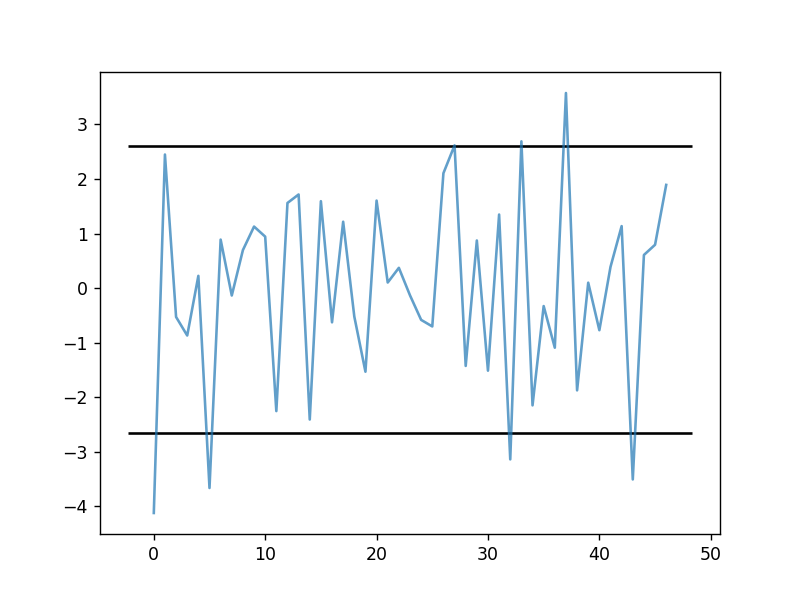

<IPython.core.display.Javascript object>


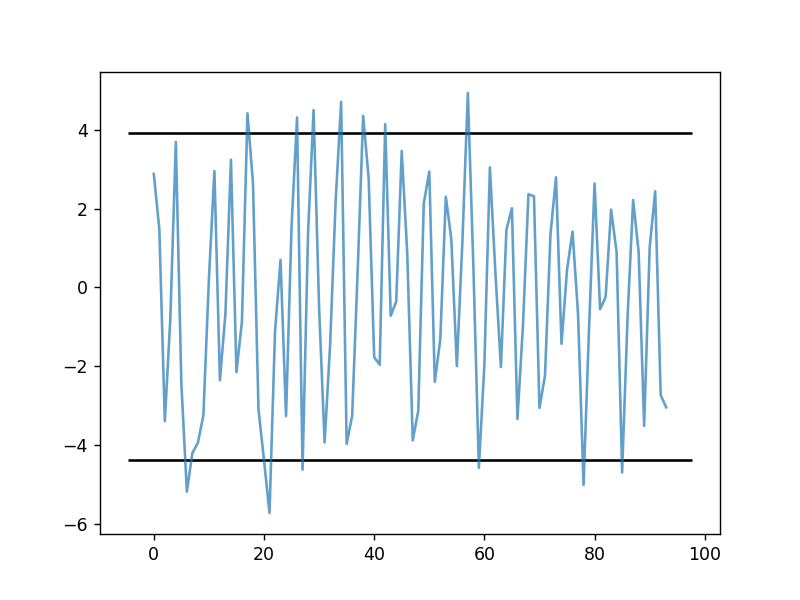

<IPython.core.display.Javascript object>


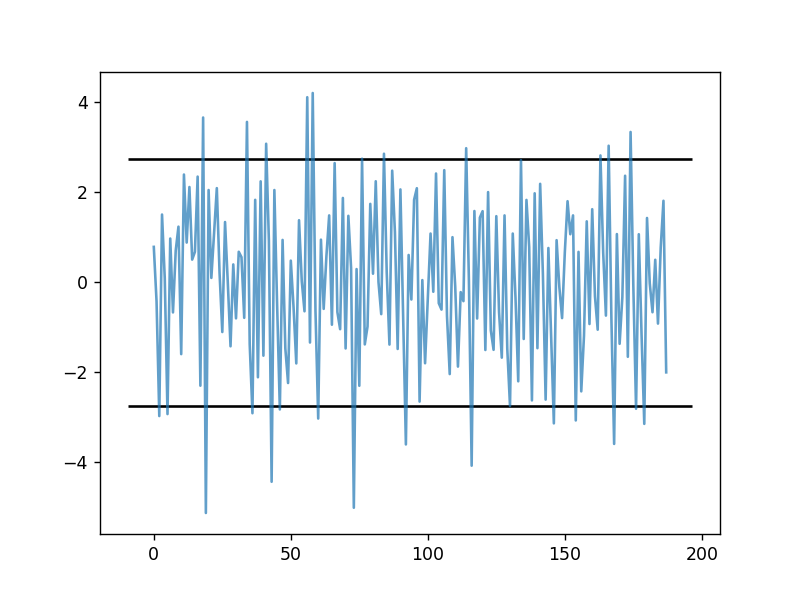

<IPython.core.display.Javascript object>


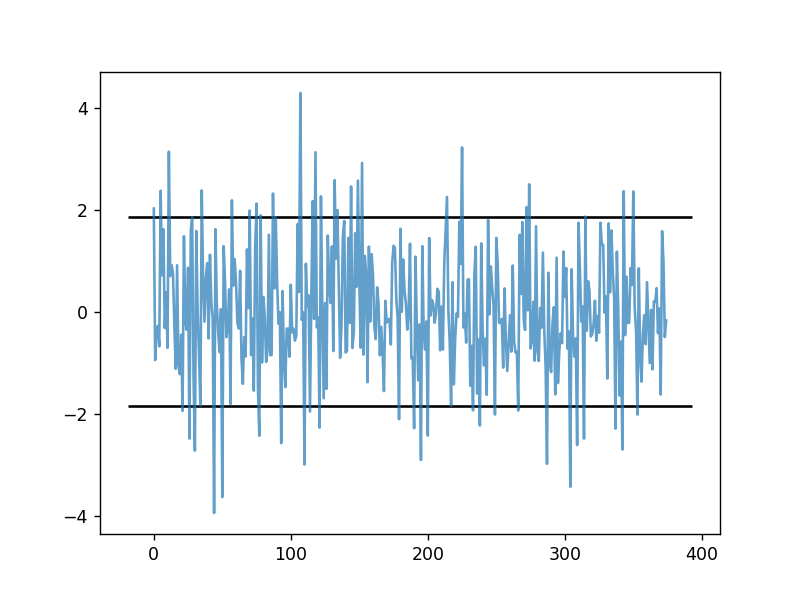

<IPython.core.display.Javascript object>


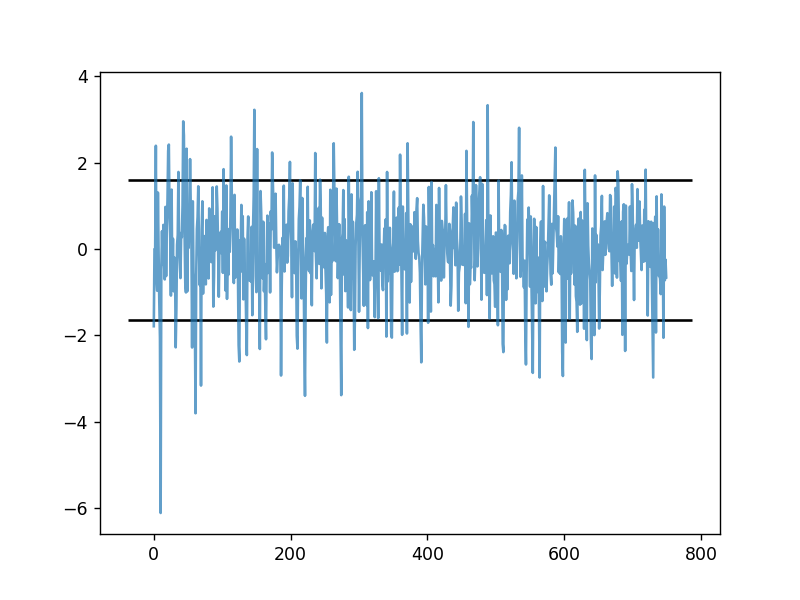

<IPython.core.display.Javascript object>


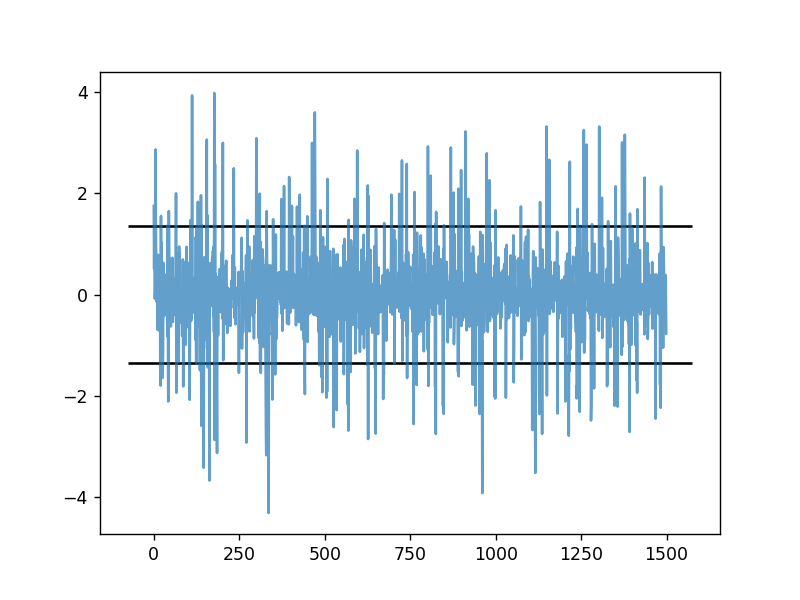

<IPython.core.display.Javascript object>


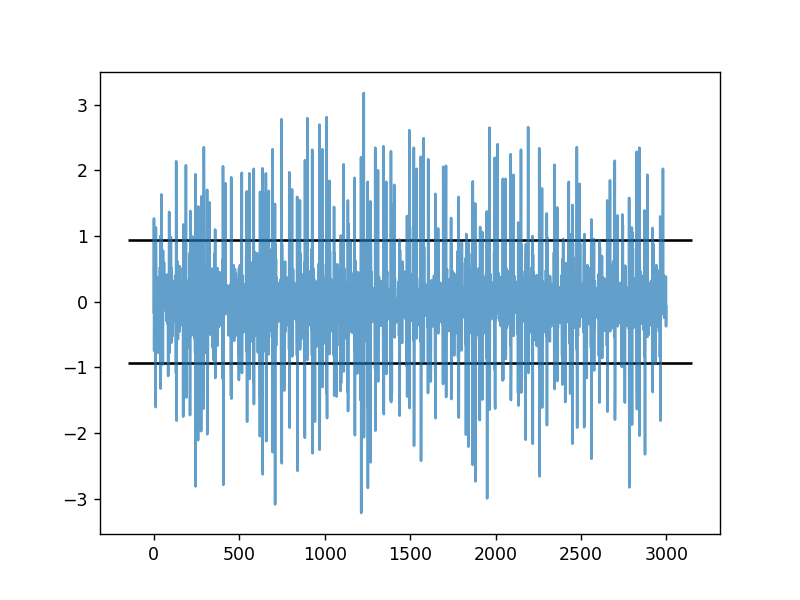

<IPython.core.display.Javascript object>


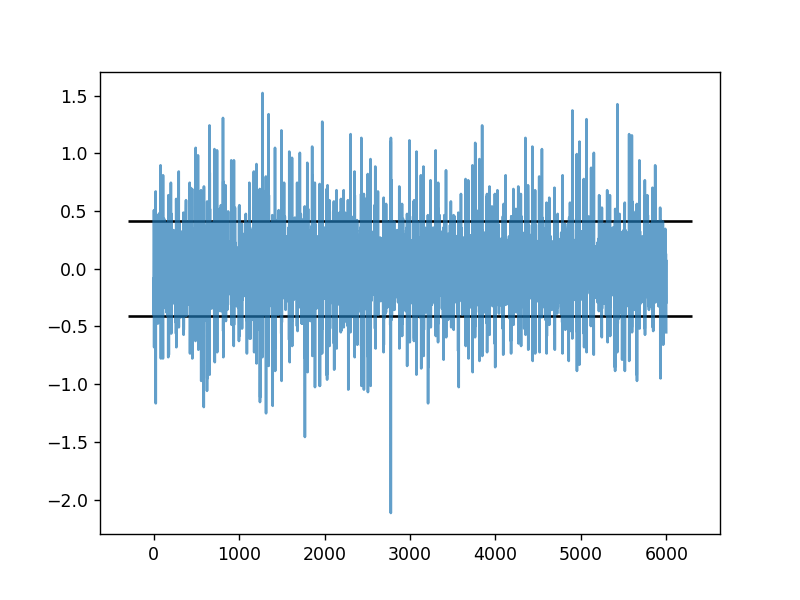

In [892]:
#denoising
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)


coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
#coeff, len(coeff)
# plt.figure()
# plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

a=[1**(i) for i in np.arange(len(coeff)-1,-1,-1)]
coeff=np.array(coeff)
for idx in range(len(coeff)):
    plt.figure()
    plt.plot(coeff[idx],alpha=0.7)
    lim=plt.xlim()
    threshold_high=np.mean(coeff[idx])+1.5*a[idx]*np.std(coeff[idx])
    threshold_low=np.mean(coeff[idx])-1.5*a[idx]*np.std(coeff[idx])
    plt.hlines(threshold_high,lim[0],lim[1])
    plt.hlines(threshold_low,lim[0],lim[1])
    coeff[idx][np.bitwise_and(coeff[idx]<threshold_high,coeff[idx]>threshold_low)]=0


<IPython.core.display.Javascript object>


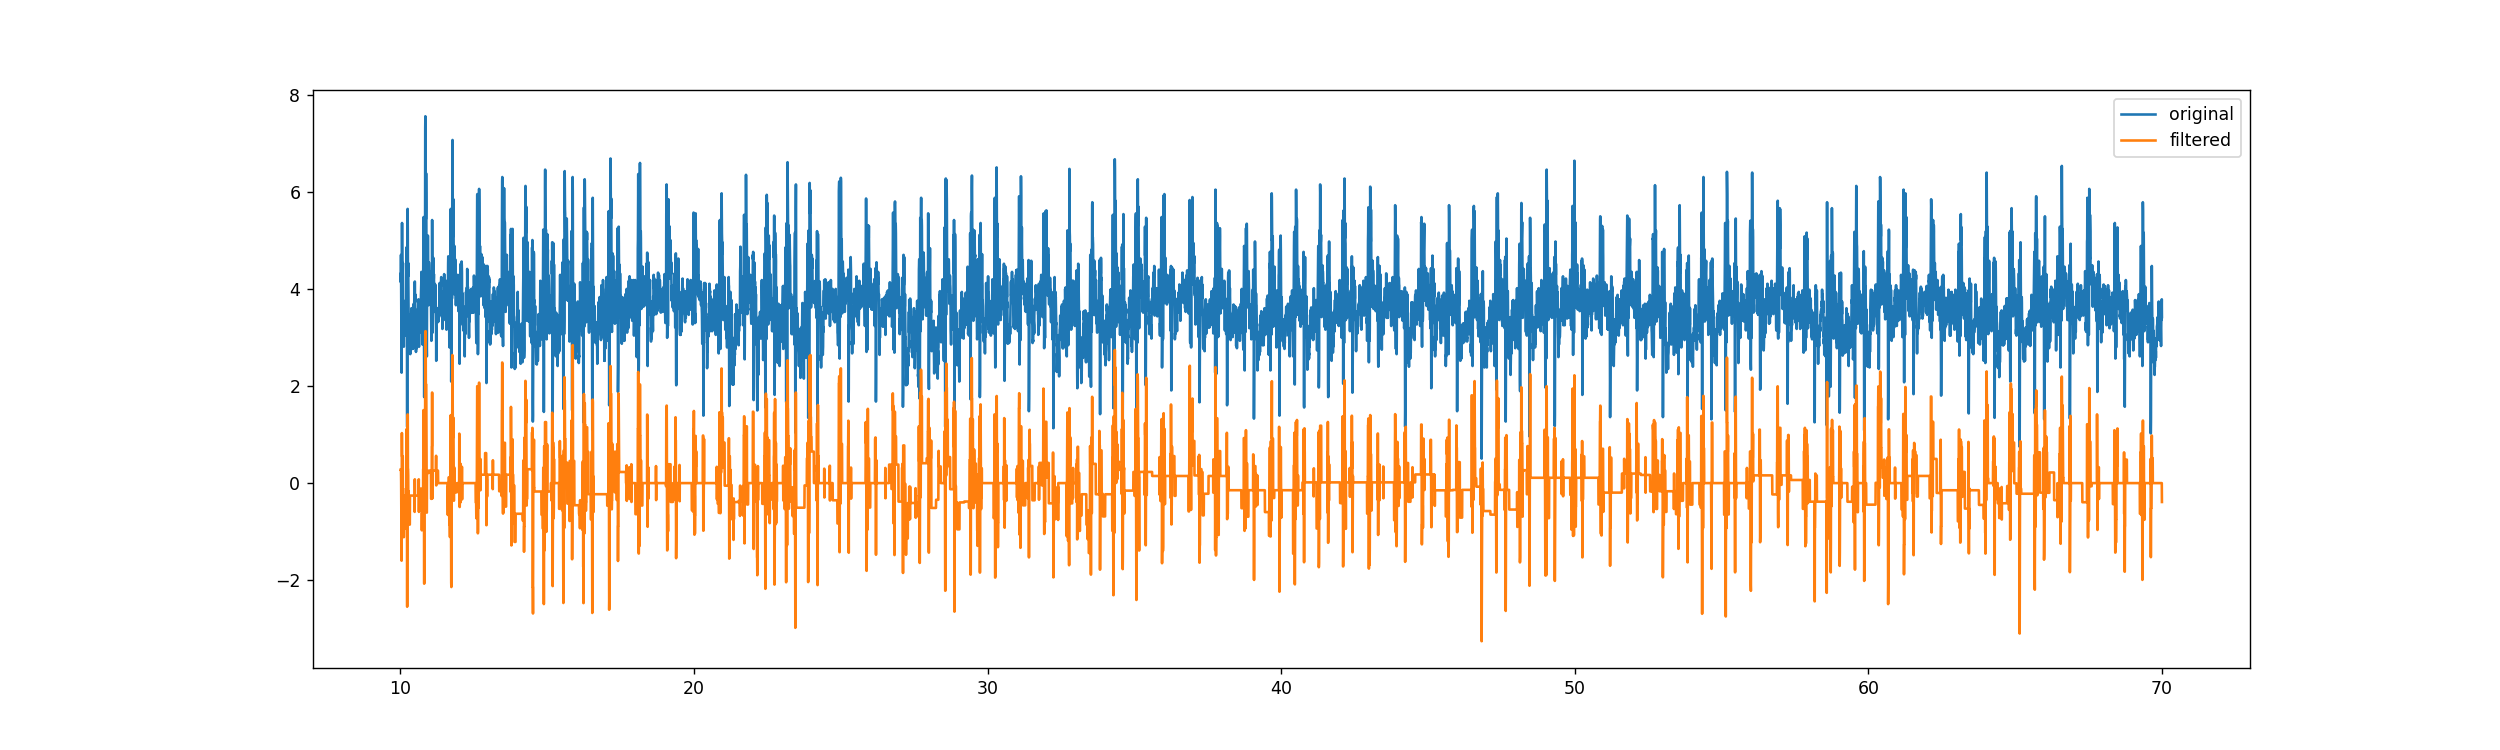

In [893]:
y1=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y1[:-1],label='filtered')
plt.legend()

<IPython.core.display.Javascript object>


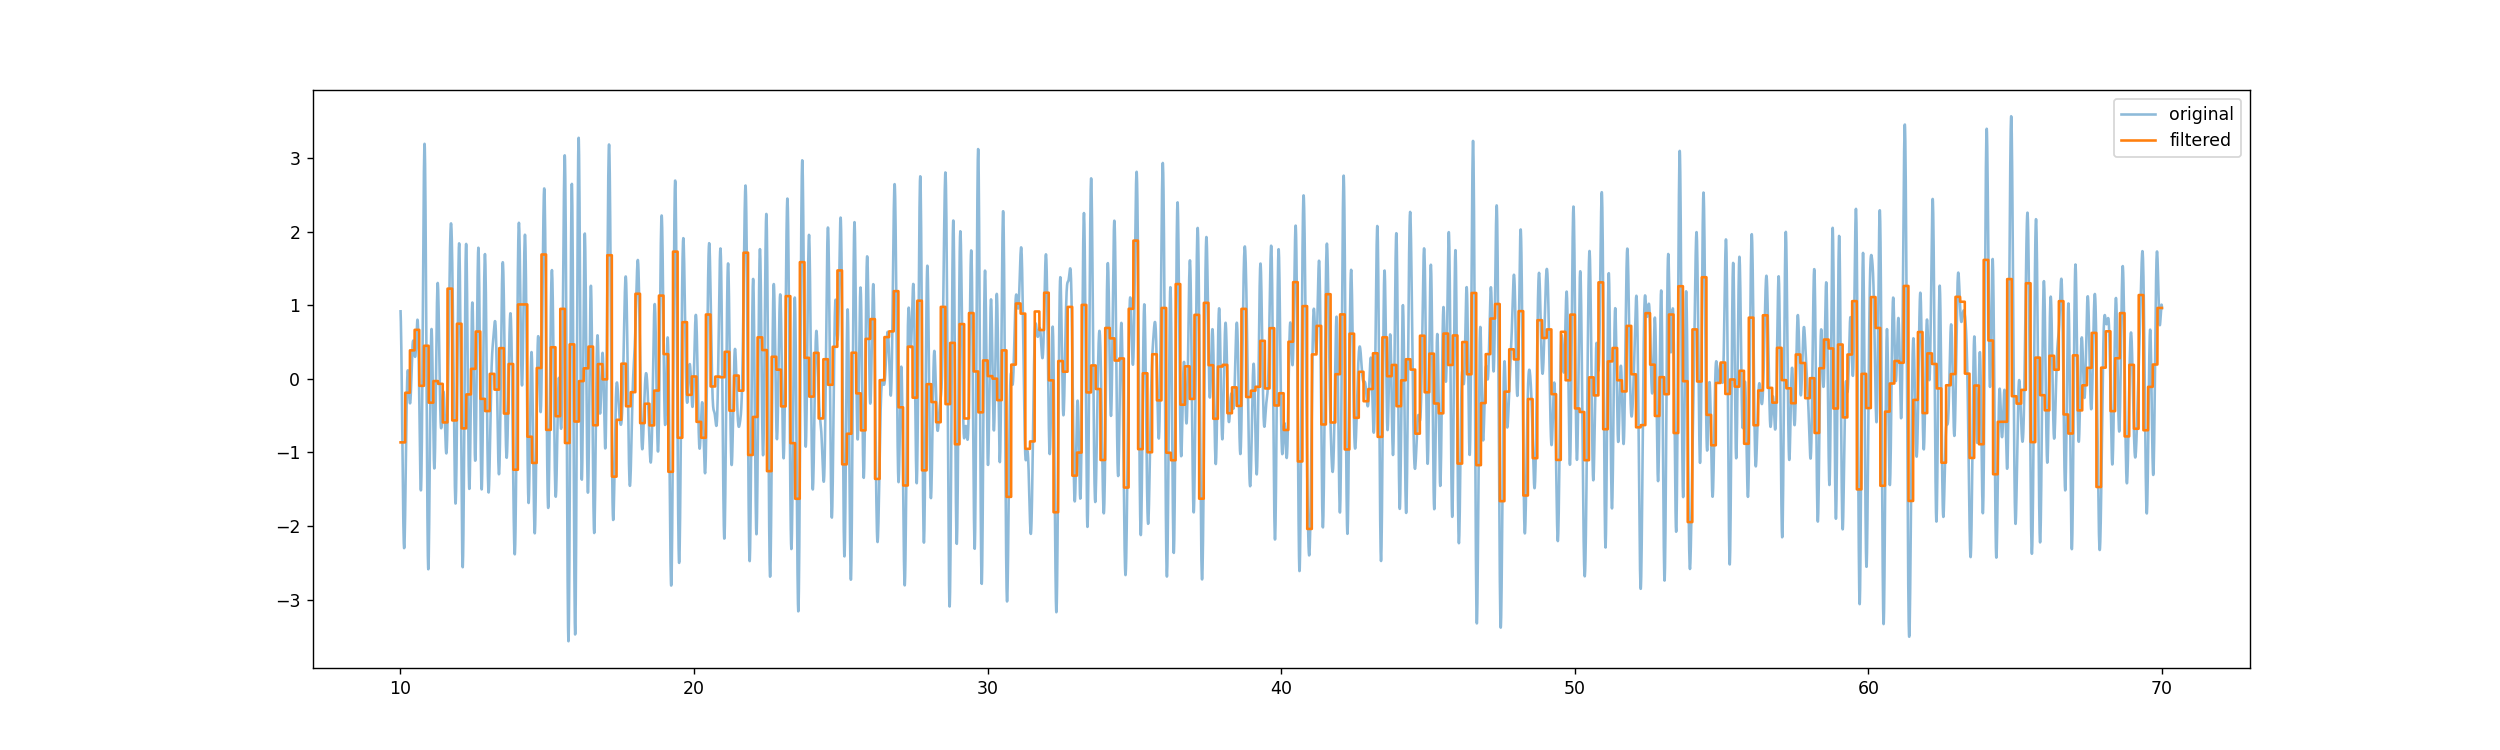

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [909]:
sign = Df['AccZ'].values#+Df['GyroZ'].values#+Df['GyroZ'].values
tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)
cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>100)] = 0
cut_sign[(freq <0.9 ) | (freq>5)] = 0
new_sign = np.fft.ifft(cut_sign)
data=new_sign
coeff=pywt.wavedec(data,'haar',mode='periodic')
#coeff=pywt.wavedec(Df['GyroX'],'haar',mode='periodic')

low_cut = 7   #included in the pass_band
high_cut = 9  #excluded

coeff=np.array(coeff)
for i in np.arange(high_cut,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,low_cut):
    coeff[j]=np.zeros(len(coeff[j])) 

# for k in [9]:
#     coeff[k]=coeff[k]*5
    

y2=pywt.waverec(list(coeff),'haar',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'].values,data, label='original', alpha=0.5)
plt.plot(Df['Time'].values,y2[:-1],label='filtered')
plt.legend()

In [908]:
#frequency range calculation
print(len(coeff))
freq_range=np.ceil(max(freq))
higher_filtered =freq_range/2**(len(coeff)-high_cut)
lower_filtered  =freq_range/2**(len(coeff)-low_cut)
lower_filtered, higher_filtered

14


(0.78125, 3.125)

<IPython.core.display.Javascript object>


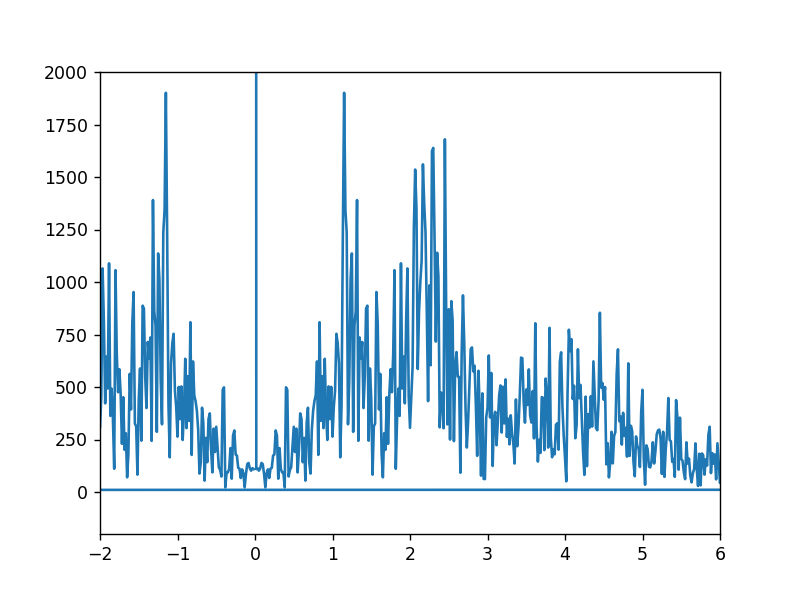

first HR:  69.0


In [402]:
filtered_freq=np.fft.fft(y2)#-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(filtered_freq)) 

%matplotlib notebook
plt.plot(freq,np.abs(filtered_freq))
plt.xlim(-2,6)
plt.ylim(-200,2000)
print("first HR: ", freq[np.argmax(np.abs(filtered_freq)[1:int(len(freq)/2)])+1]*60)

In [85]:
freq,np.abs(filtered_freq)

(array([ 0.        ,  0.01538462,  0.03076923, ..., -0.04615385,
        -0.03076923, -0.01538462]),
 array([4.82517379e+04, 3.04330393e+01, 1.96051889e+01, ...,
        2.23886958e+01, 1.96051889e+01, 3.04330393e+01]))

## Set 1

In [160]:
df=pd.read_csv('1_Stave_supine_static.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY      AccZ     GyroX  \
0            5       100  1555487493  490.379  308.172   863.028 -40.73171   
1            5       100  1555487493   32.513  230.153  1015.406  23.90244   
2            5       100  1555487493   36.539  256.200  1012.051 -21.46342   
3            5       100  1555487493   65.331  241.194  1013.454 -30.24390   
4            5       100  1555487493   19.337  250.649  1004.121 -35.73171   
...        ...       ...         ...      ...      ...       ...       ...   
9165         5       100  1555487805   75.274 -682.590   664.778  34.14634   
9166         5       100  1555487805  131.760 -664.717   704.428  35.12195   
9167         5       100  1555487805  168.665 -679.479   751.581  36.70732   
9168         5       100  1555487805  204.472 -709.491   826.794  40.12195   
9169         5       100  1555487805  819.657 -365.268   103.090  66.09756   

          GyroY       GyroZ  MagnX  MagnY  MagnZ        qw        qi  \
0     30.975610   45.853660   -642    -90    -83  0.182482  0.375561   
1     25.609760   40.731710   -177   -185   -321  0.910500  0.099033   
2      3.780488   11.219510   -179   -185   -325  0.881061  0.112613   
3     11.219510    6.341464   -180   -185   -325  0.877629  0.112827   
4     12.926830    0.975610   -178   -182   -328  0.876462  0.111820   
...         ...         ...    ...    ...    ...       ...       ...   
9165  31.585370  -59.146340   -142    257   -480  0.153829 -0.093692   
9166  21.097560  -68.292690   -138    255   -482  0.148201 -0.093112   
9167  17.682930  -76.097560   -142    254   -479  0.142147 -0.093326   
9168  18.170730  -87.195120   -139    253   -479  0.135352 -0.093844   
9169   5.731708 -107.682900   -140    248   -481  0.126385 -0.092441   

            qj        qk   Time  
0     0.139683  0.897855   0.00  
1     0.037385  0.399731   0.01  
2     0.042390  0.457442   0.02  
3     0.042695  0.463912   0.03  
4     0.042726  0.466353   0.04  
...        ...       ...    ...  
9165  0.324564 -0.928556  91.65  
9166  0.321390 -0.930631  91.66  
9167  0.317850 -0.932768  91.67  
9168  0.314005 -0.935026  91.68  
9169  0.307810 -0.938475  91.69  

[9170 rows x 17 columns]

In [161]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time    AccX    AccY     AccZ     GyroX     GyroY     GyroZ
1801  18.01  37.881  18.666 -929.030 -2.560976  1.829268  0.121951
1802  18.02  35.380  23.729 -924.638 -2.560976  1.585366  0.243902
1803  18.03  47.519  20.679 -949.343 -2.682927  1.585366  0.365854
1804  18.04  38.186  22.265 -947.391 -2.439024  1.829268  0.365854
1805  18.05  46.909  25.864 -926.834 -2.439024  1.585366  0.365854
...     ...     ...     ...      ...       ...       ...       ...
8045  80.45  42.090  22.631 -907.802 -2.439024  1.463415  0.243902
8046  80.46  44.957  19.093 -914.573 -2.560976  1.341463  0.365854
8047  80.47  53.497  18.727 -940.376 -2.682927  1.585366  0.121951
8048  80.48  42.944  19.886 -932.629 -2.804878  1.585366  0.243902
8049  80.49  50.081  19.703 -914.207 -2.560976  1.707317  0.243902

[6249 rows x 7 columns]

<IPython.core.display.Javascript object>


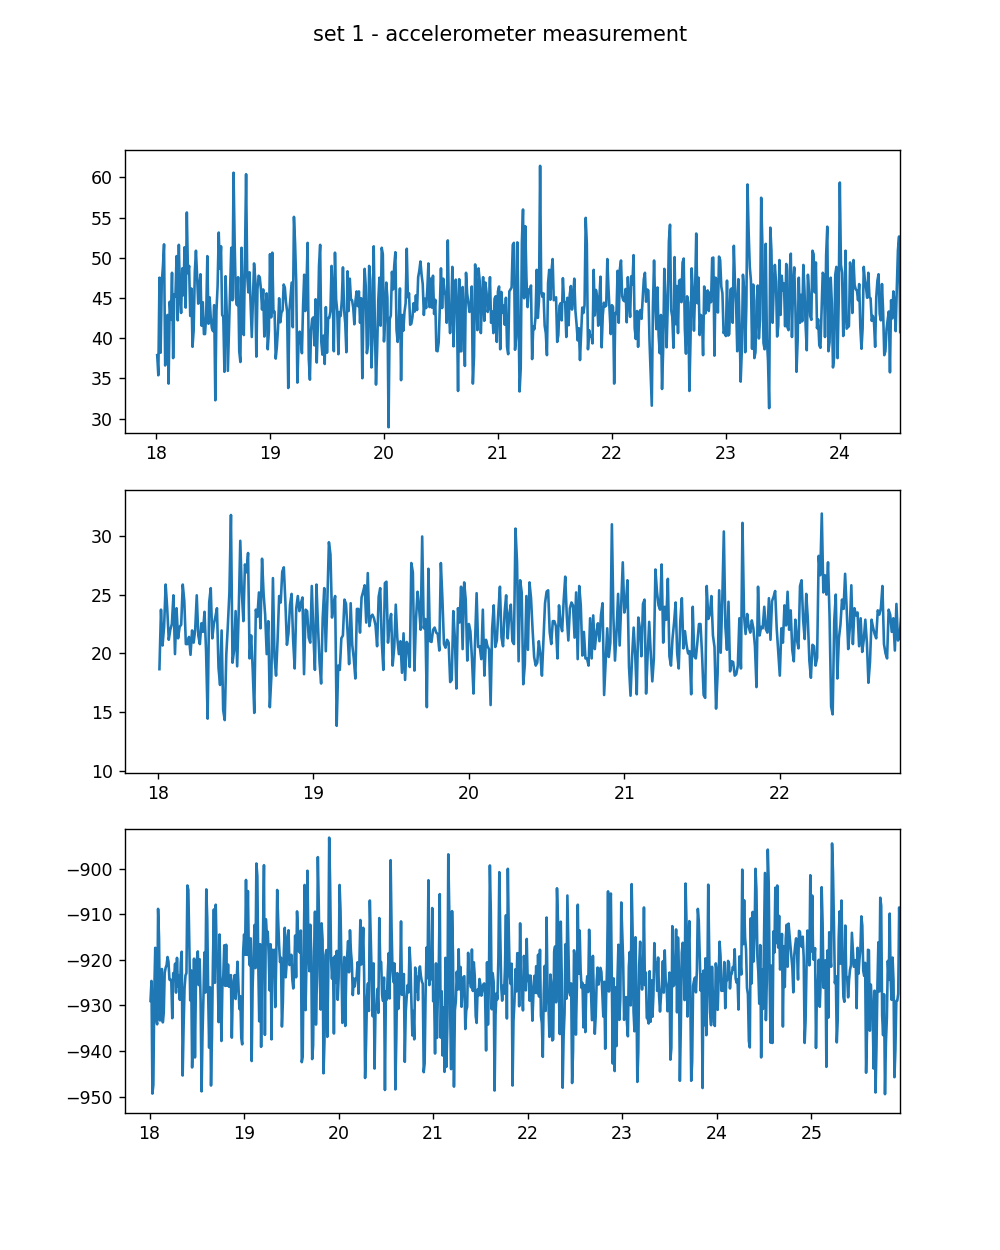

Text(0.5, 0.98, 'set 1 - accelerometer measurement')

In [162]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 1 - accelerometer measurement")


<IPython.core.display.Javascript object>


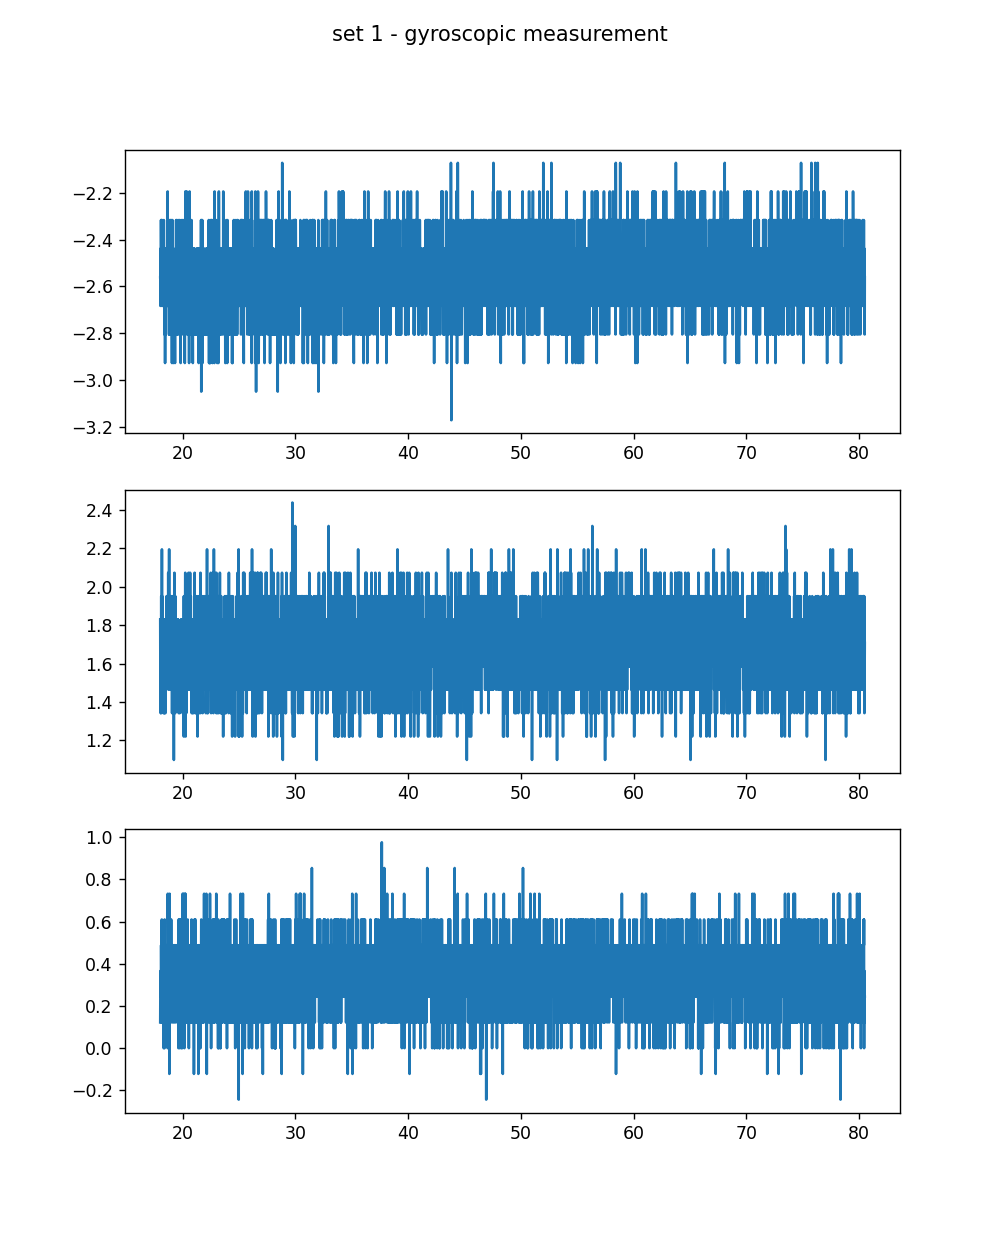

Text(0.5, 0.98, 'set 1 - gyroscopic measurement')

In [163]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

## Set 3

In [155]:
df=pd.read_csv('3_Subject_sitting_chair.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY      AccZ     GyroX  \
0            5       100  1555432128  -32.940  132.309  1385.676  2.926829   
1            5       100  1555432128  139.080  -31.659  1044.259  1.341463   
2            5       100  1555432128   15.311  -33.184  1025.227 -3.902439   
3            5       100  1555432128   13.847  -35.807  1017.480 -4.024390   
4            5       100  1555432128    8.052  -35.258  1018.456 -2.560976   
...        ...       ...         ...      ...      ...       ...       ...   
6981         5       100  1555432196   -8.235  -20.252  1008.513 -3.170732   
6982         5       100  1555432196   -0.793  -16.836  1009.428 -3.170732   
6983         5       100  1555432196    1.708  -23.363  1016.870 -3.414634   
6984         5       100  1555432196    3.477  -22.143  1015.345 -3.414634   
6985         5       100  1555432196   -2.806  -18.422  1031.815 -3.902439   

         GyroY     GyroZ  MagnX  MagnY  MagnZ        qw        qi        qj  \
0    -9.024390 -6.463415   -156     28   -227  0.814846  0.039003 -0.048311   
1     1.341463  0.365854   -156     29   -229  0.790196  0.041566 -0.051118   
2     0.975610  0.365854   -154     29   -228  0.785478  0.041871 -0.051576   
3     1.219512  0.243902   -155     29   -227  0.783404  0.041841 -0.051759   
4     1.829268  0.121951   -155     29   -227  0.782211  0.041932 -0.051851   
...        ...       ...    ...    ...    ...       ...       ...       ...   
6981  1.341463  0.121951   -151     26   -223  0.779997 -0.000336  0.001434   
6982  1.463415  0.487805   -153     25   -221  0.779996 -0.000336  0.001495   
6983  1.341463  0.365854   -151     24   -222  0.779972 -0.000549  0.001312   
6984  1.097561  0.487805   -155     25   -222  0.779973 -0.000549  0.001129   
6985  1.097561  0.365854   -152     23   -223  0.779972 -0.000671  0.001221   

            qk   Time  
0    -0.576342   0.00  
1    -0.609302   0.01  
2    -0.615314   0.02  
3    -0.617939   0.03  
4    -0.619434   0.04  
...        ...    ...  
6981 -0.625782  69.81  
6982 -0.625782  69.82  
6983 -0.625812  69.83  
6984 -0.625813  69.84  
6985 -0.625812  69.85  

[6986 rows x 17 columns]

In [156]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time    AccX    AccY      AccZ     GyroX     GyroY     GyroZ
401    4.01  16.531 -36.905  1004.487 -2.682927  1.707317  0.365854
402    4.02   2.989 -33.489  1023.458 -2.560976  1.341463  0.365854
403    4.03  10.858 -37.637  1020.225 -2.682927  1.829268  0.243902
404    4.04   0.610 -35.990  1010.526 -2.926829  1.341463  0.121951
405    4.05   4.819 -35.990  1014.918 -2.804878  1.341463  0.487805
...     ...     ...     ...       ...       ...       ...       ...
6795  67.95   4.758 -30.134   996.984 -2.560976  1.341463  0.243902
6796  67.96  -0.366 -34.831  1028.826 -2.682927  1.585366  0.121951
6797  67.97   6.527 -34.160  1031.632 -2.926829  1.463415  0.000000
6798  67.98  -1.342 -39.284   994.605 -2.560976  1.585366  0.121951
6799  67.99   4.209 -30.927  1016.992 -2.560976  1.585366  0.487805

[6399 rows x 7 columns]

<IPython.core.display.Javascript object>


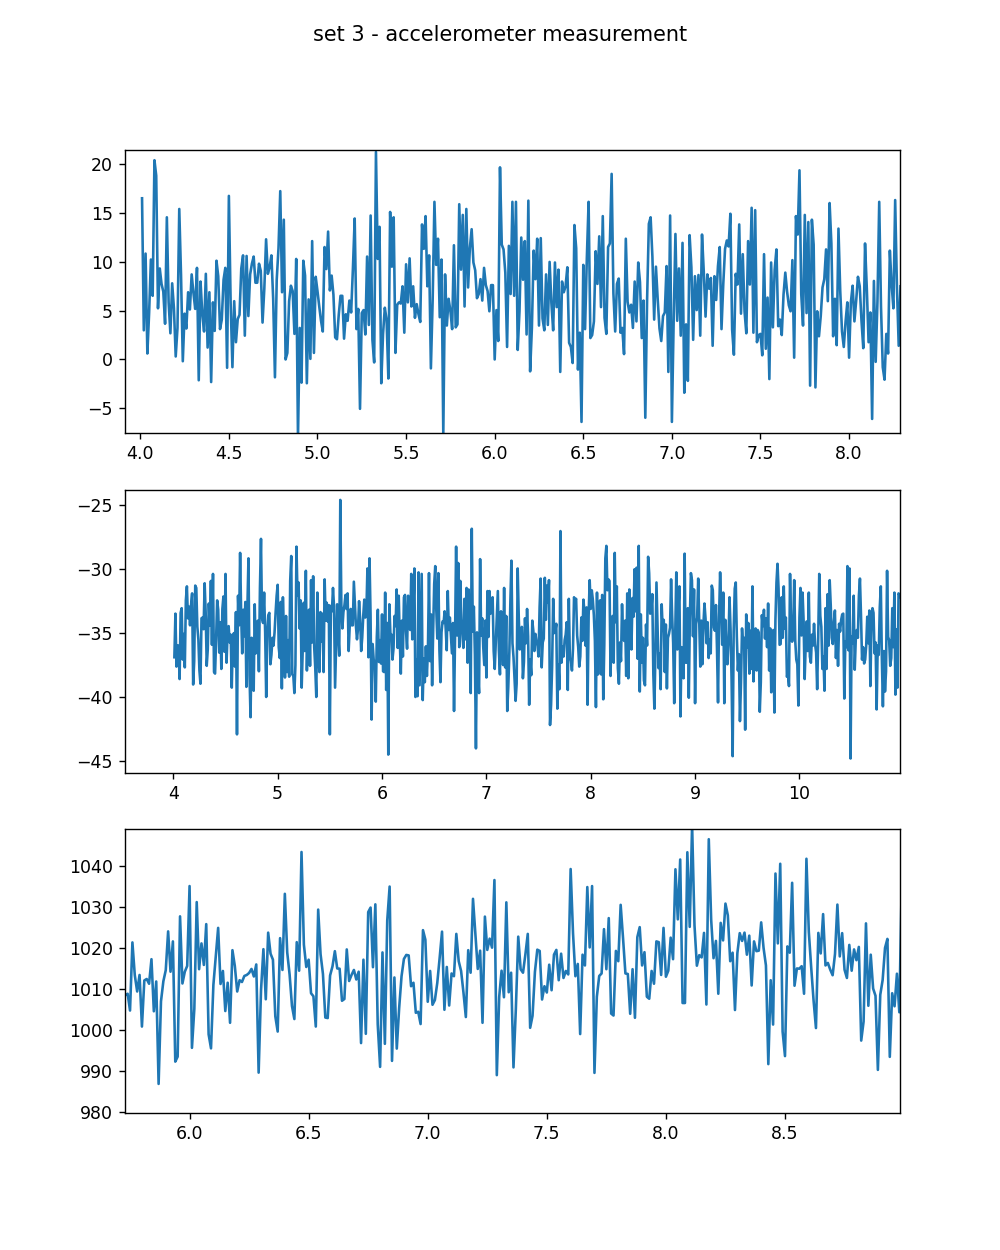

Text(0.5, 0.98, 'set 3 - accelerometer measurement')

In [157]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 3 - accelerometer measurement")


<IPython.core.display.Javascript object>


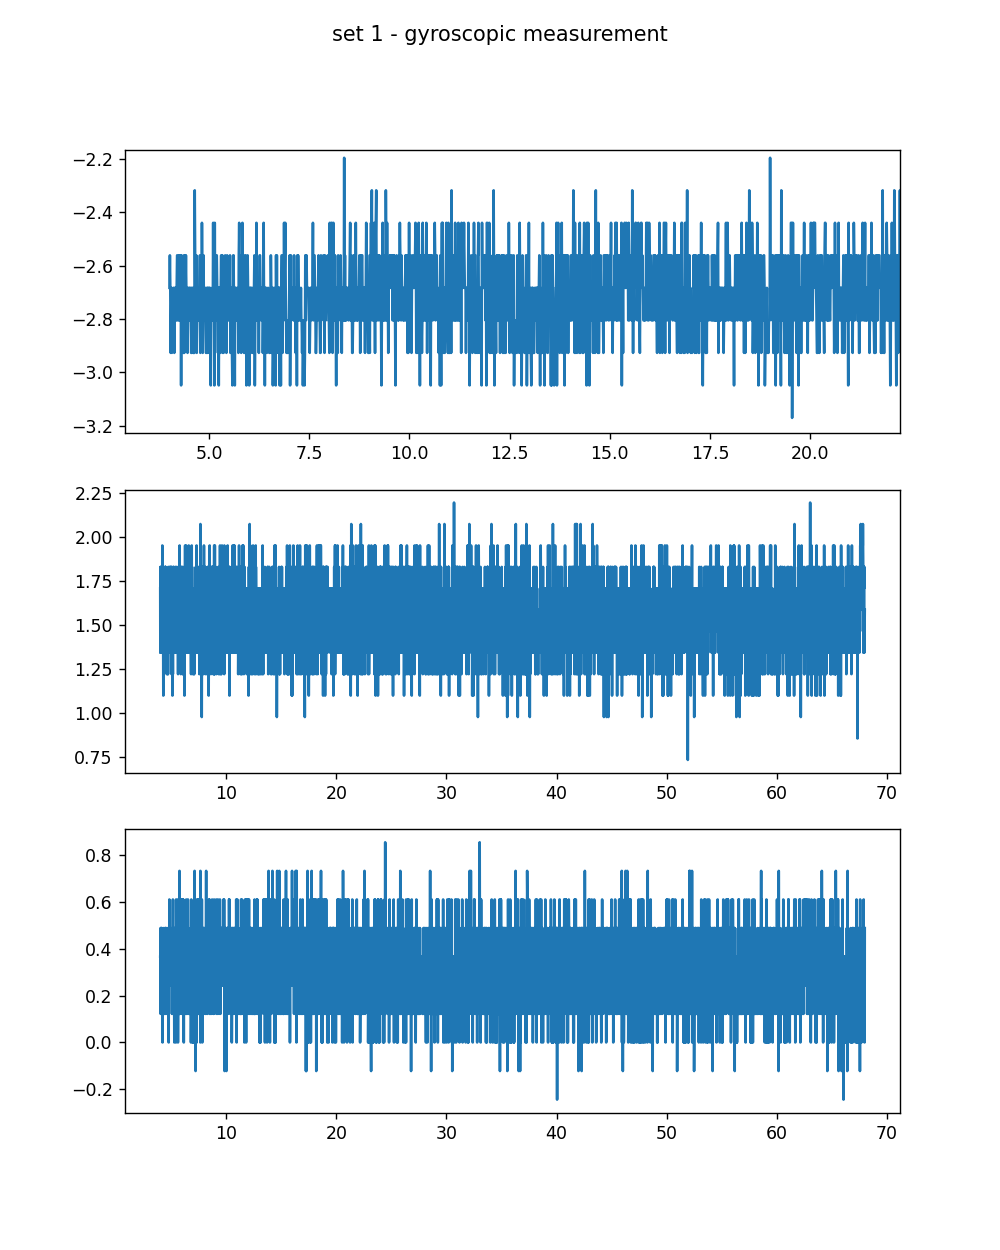

Text(0.5, 0.98, 'set 1 - gyroscopic measurement')

In [158]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

<IPython.core.display.Javascript object>


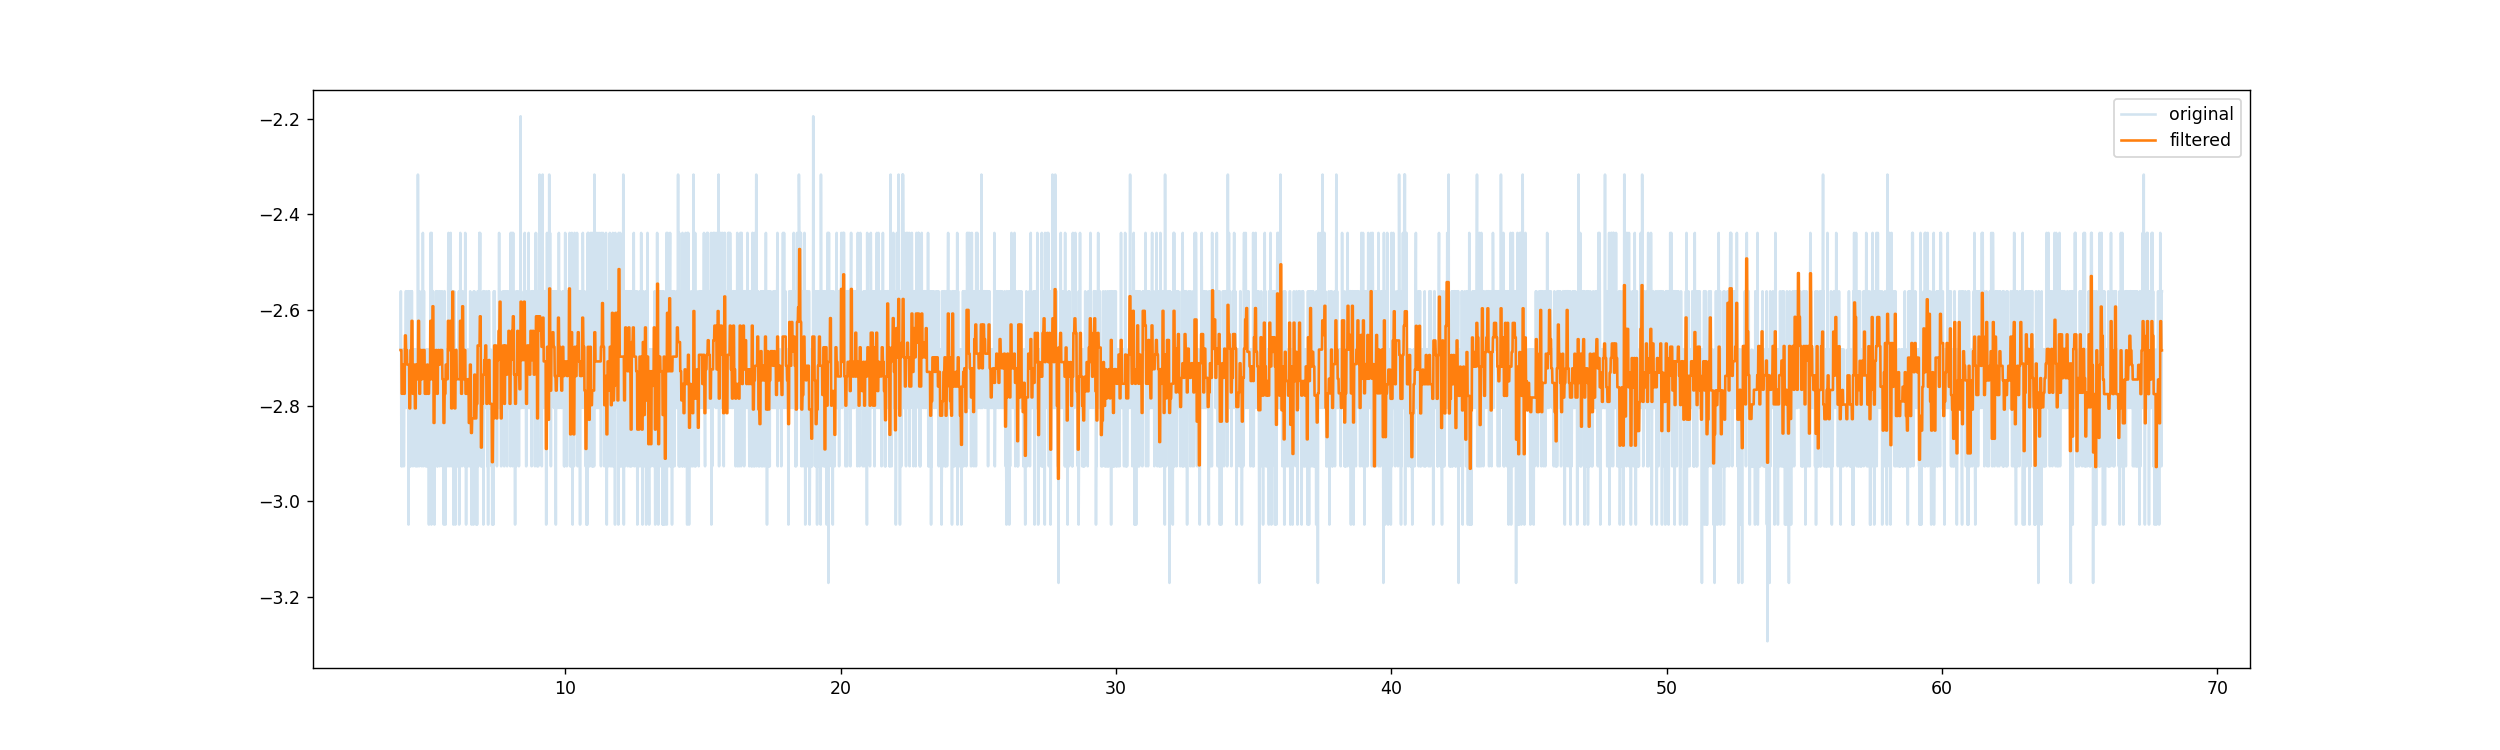

In [159]:
coeff=pywt.wavedec(Df['GyroX'],'db1',mode='periodic')

coeff=np.array(coeff)
for i in np.arange(11,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,5):
    coeff[j]=np.zeros(len(coeff[j])) 

y2=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroX'], label='original', alpha=0.2)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()

In [ ]:
len(coeff)

## Find_peak

### GyroX

<IPython.core.display.Javascript object>


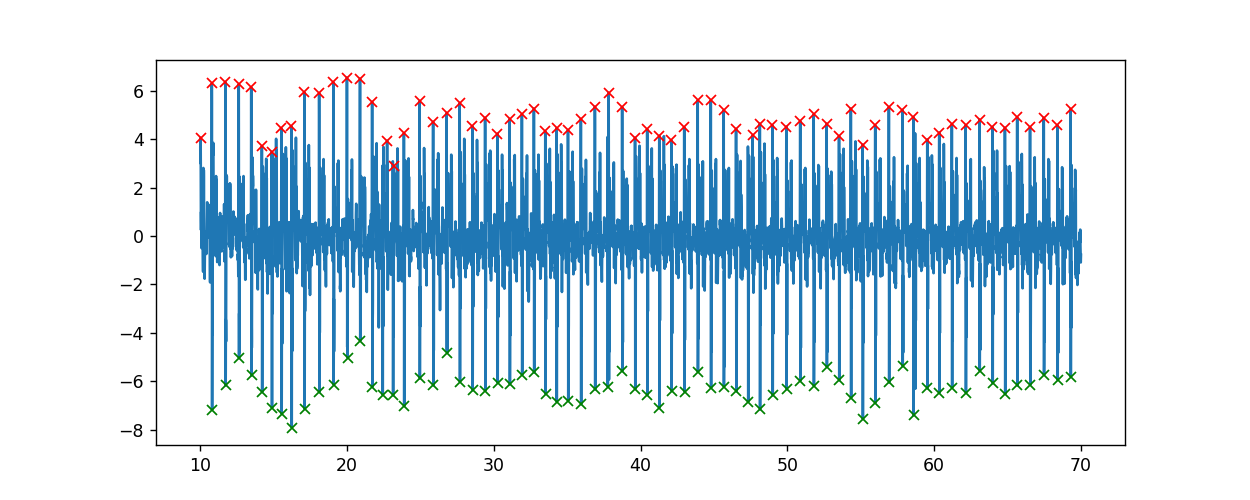

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [897]:

sign = Df['GyroX'].values#+Df['GyroZ'].values#+Df['GyroZ'].values

tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)

cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>100)] = 0
#cut_sign[(freq <0.9 ) | (freq>1.66) ] = 0
new_sign = np.fft.ifft(cut_sign)

%matplotlib notebook
plt.figure(figsize=(10,4))
data = new_sign 
plt.plot(Df['Time'].values,data)
peaks,_ = signal.find_peaks(data, height=1.5 , distance=90,threshold=None, prominence=None)
#print(peaks)
plt.plot(Df['Time'].values[peaks],data[peaks], 'rx')
#plt.ylim(0,4)
peaks2,_=signal.find_peaks(-data, height=4, distance=90)
plt.plot(Df['Time'].values[peaks2],data[peaks2], 'gx')

In [853]:
def histo_func(bins,bins2):
    from matplotlib.gridspec import GridSpec
    peaks_time=Df['Time'].values[peaks]
    period = peaks_time[1:]-peaks_time[:-1]
    rate = 1/period*60

    peaks_time2=Df['Time'].values[peaks2]
    period2 = peaks_time2[1:]-peaks_time2[:-1]
    rate2 = 1/period2*60

    fig = plt.figure(figsize=(10,5))
    gs = GridSpec(3,4)

    ax_main = fig.add_subplot(gs[:,:2])
    ax_marg = fig.add_subplot(gs[:,2])
    ax_marg2 = fig.add_subplot(gs[:,3])
    ax_main.plot((peaks_time[1:]+peaks_time[:-1])*0.5,rate,'b-o')
    ax_main.plot((peaks_time2[1:]+peaks_time2[:-1])*0.5,rate2,'g-o')
    ax_main.set_xlabel('Time (s)')
    ax_main.set_ylabel('Heart BPM')
    ax_main.set_title('Heart BPM as a function of time and histogram')
    l=ax_main.get_ylim()

    h,b,_=ax_marg.hist(x=rate, bins=bins,orientation='horizontal', color='blue')
    bin_center=(b[1:]+b[:-1])*0.5
    ax_marg.set_ylim(l)

    h2,b2,_=ax_marg2.hist(x=rate2, bins=bins2,orientation='horizontal', color='green')
    bin_center2=(b2[1:]+b2[:-1])*0.5
    ax_marg2.set_ylim(l)

    mod = GaussianModel(prefix='g_')
    pars = mod.guess(h, x=bin_center)
    out = mod.fit(h, pars, x=bin_center)
    #print(out.params)
    #ax_marg.plot(out.best_fit, bin_center, 'r-', label='best fit')
    print(out.params['g_center'].value, out.params['g_center'].stderr)
    print(out.params['g_sigma'].value, out.params['g_sigma'].stderr)


<IPython.core.display.Javascript object>


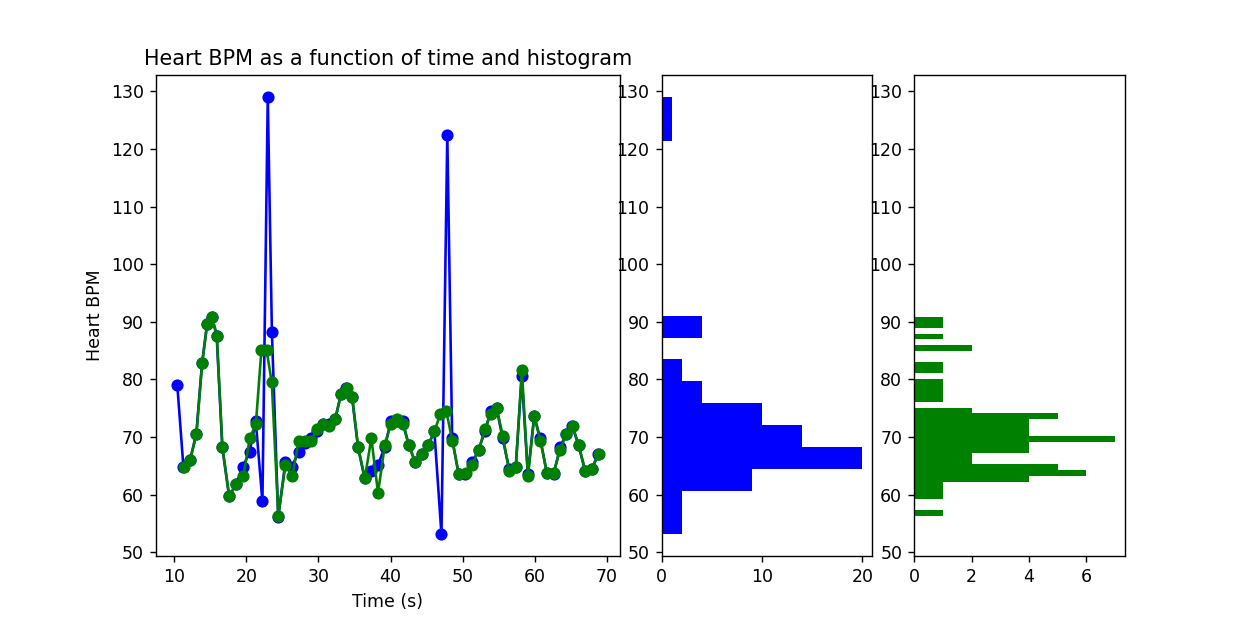

68.08784005769223 0.40506773667482365
5.094667643546883 0.4053604374405096


In [847]:
histo_func(20,35)

### GyroY

<IPython.core.display.Javascript object>


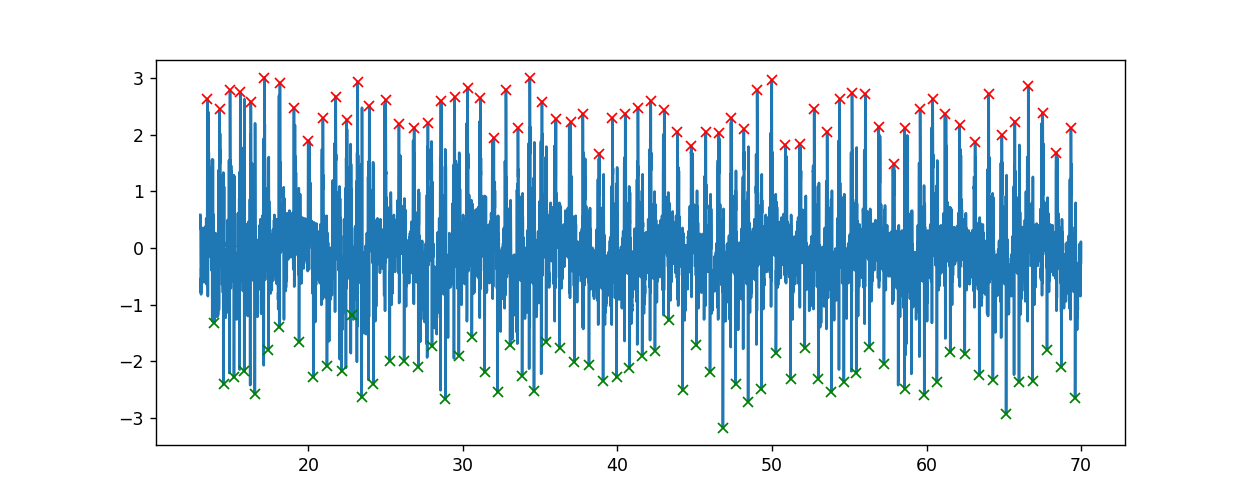

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [800]:
sign = Df['GyroY'].values[(Df['Time']>13)]

tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)

cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>100)] = 0
#cut_sign[(freq <0.66 ) | (freq>1.7) ] = 0
new_sign = np.fft.ifft(cut_sign)

%matplotlib notebook
plt.figure(figsize=(10,4))
data = new_sign 
plt.plot(Df['Time'].values[(Df['Time']>13)],data)
peaks,_ = signal.find_peaks(data, height=1 , distance=120,threshold=None, prominence=None)
#print(peaks)
plt.plot(Df['Time'].values[(Df['Time']>13)][peaks],data[peaks], 'rx')
#plt.ylim(0,4)
peaks2,_=signal.find_peaks(-data, height=1, distance=120)
plt.plot(Df['Time'].values[(Df['Time']>13)][peaks2],data[peaks2], 'gx')


<IPython.core.display.Javascript object>


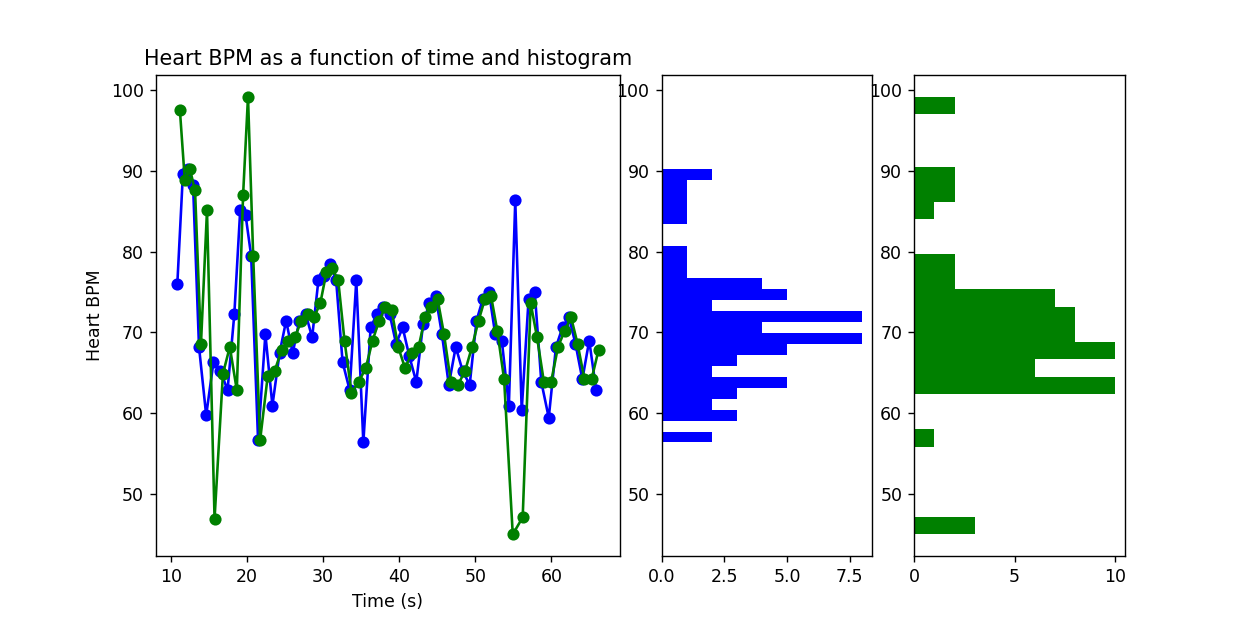

69.48183114318968 0.8505669445919973
6.025226147359576 0.8704198133956055


In [801]:
histo_func(25,25)

### GyroZ

<IPython.core.display.Javascript object>


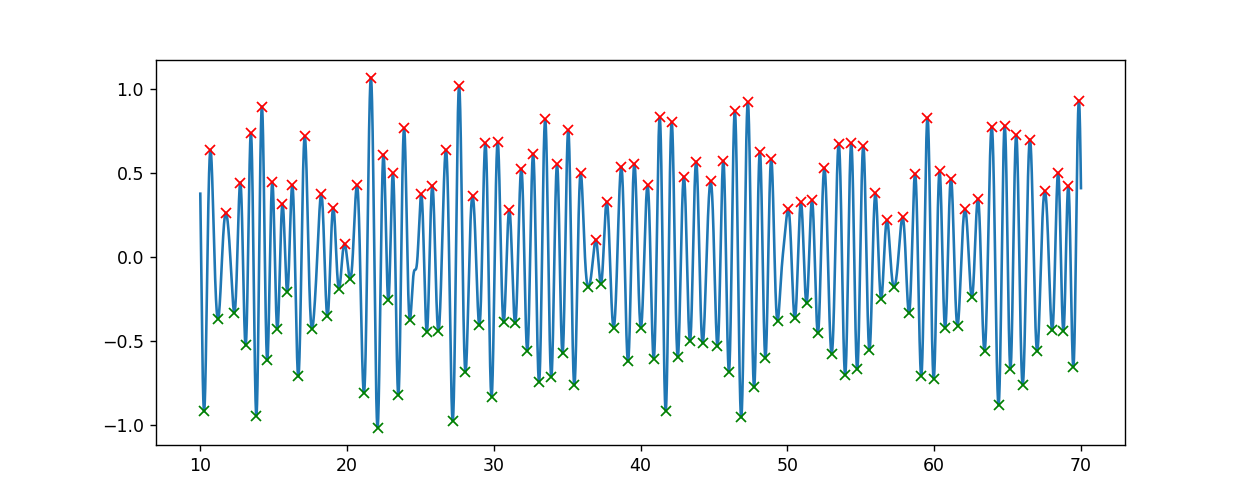

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [826]:
sign = Df['AccY'].values#[(Df['Time']>30)]

tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)

cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>100)] = 0
cut_sign[(freq <0.66 ) | (freq>1.66) ] = 0
new_sign = np.fft.ifft(cut_sign)

%matplotlib notebook
plt.figure(figsize=(10,4))
data = new_sign 
plt.plot(Df['Time'].values,data)
peaks,_ = signal.find_peaks(data, height=0. , distance=110,threshold=None, prominence=None)
#print(peaks)
plt.plot(Df['Time'].values[peaks],data[peaks], 'rx')
#plt.ylim(0,4)
peaks2,_=signal.find_peaks(-data, height=0., distance=110)
plt.plot(Df['Time'].values[peaks2],data[peaks2], 'gx')


<IPython.core.display.Javascript object>


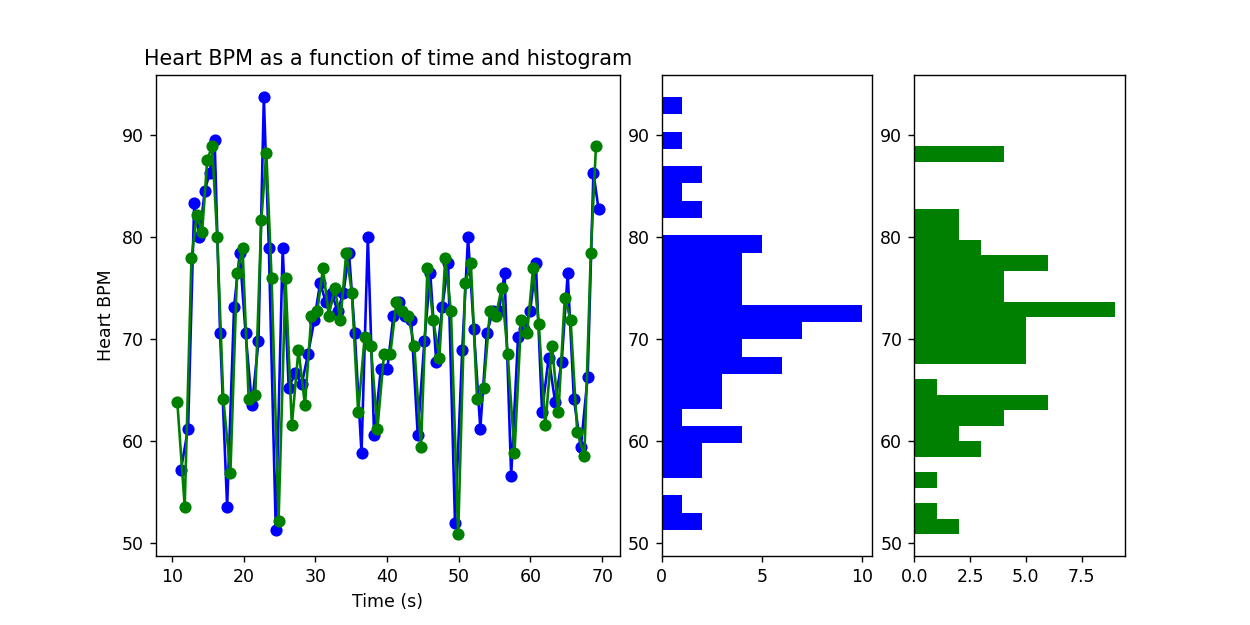

71.40962957062433 0.9340064569886635
7.200366001381903 0.9365705851679185


In [828]:
histo_func(25,25)

<IPython.core.display.Javascript object>


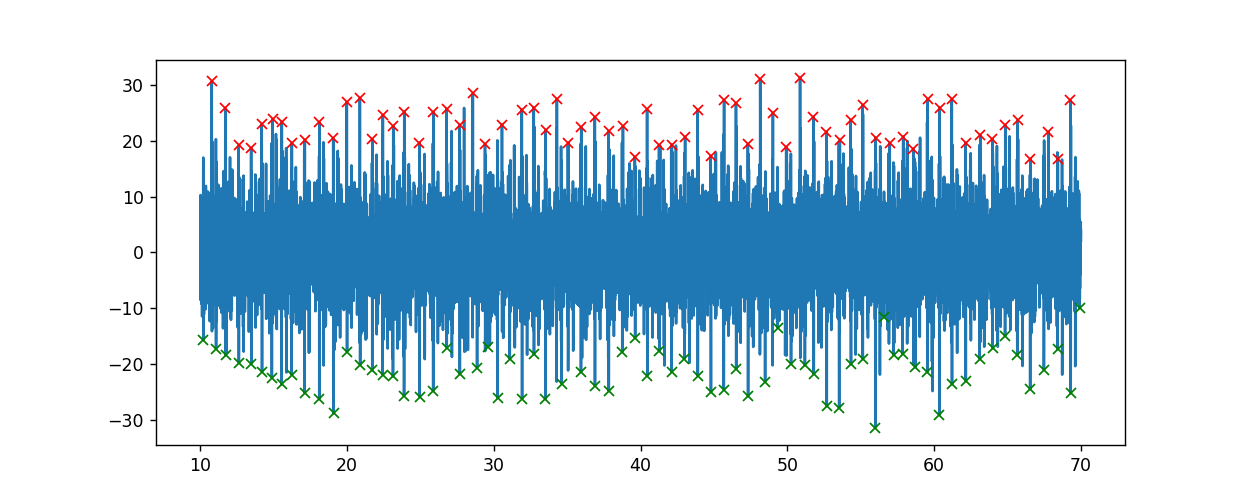

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [910]:
sign = Df['AccZ'].values#[(Df['Time']>30)]

tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)

cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>100)] = 0
cut_sign[(freq <0.66 ) | (freq>90) ] = 0
new_sign = np.fft.ifft(cut_sign)

%matplotlib notebook
plt.figure(figsize=(10,4))
data = new_sign 
plt.plot(Df['Time'].values,data)
peaks,_ = signal.find_peaks(data, height=12 , distance=125,threshold=None, prominence=None)
#print(peaks)
plt.plot(Df['Time'].values[peaks],data[peaks], 'rx')
#plt.ylim(0,4)
peaks2,_=signal.find_peaks(-data, height=9, distance=120)
plt.plot(Df['Time'].values[peaks2],data[peaks2], 'gx')


<IPython.core.display.Javascript object>


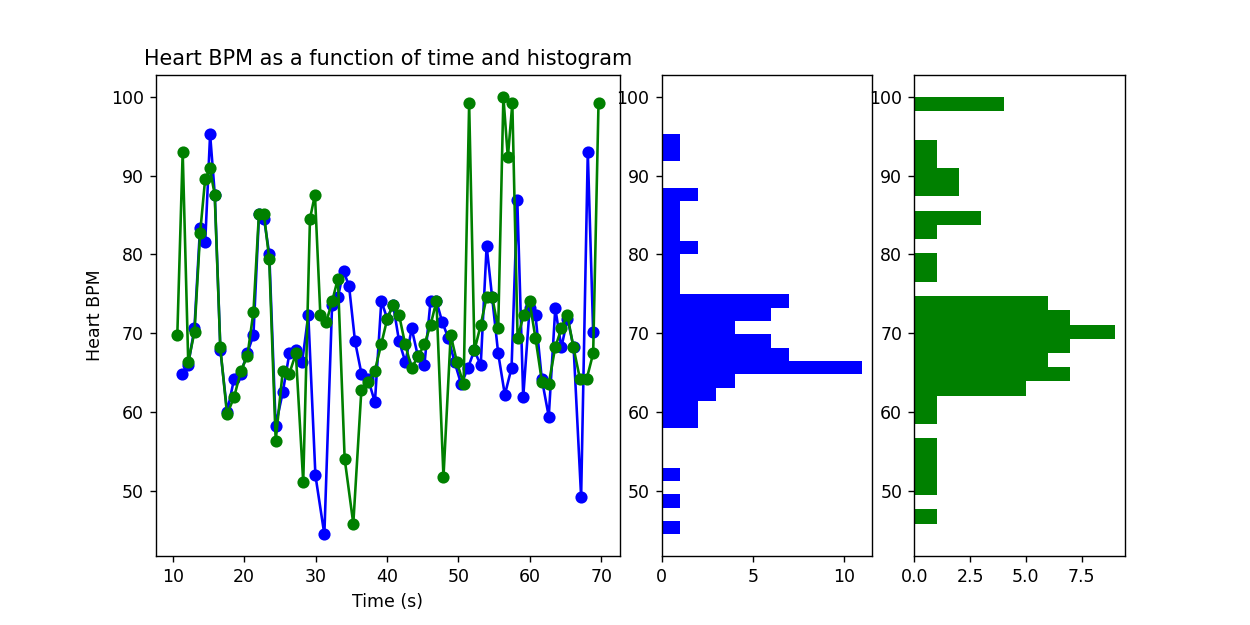

68.18620232140891 0.6423777487990228
5.339601355282647 0.6423769217610946


In [911]:
histo_func(30,30)